![](https://jalammar.github.io/images/bert-transfer-learning.png)

![](https://jalammar.github.io/images/bert-output-vector.png)

In [ ]:
!pip install torch transformers datasets evaluate seqeval

In [2]:
from evaluate import load

In [3]:
from transformers import AutoModel, AutoTokenizer

In [4]:
bert = AutoModel.from_pretrained("prajjwal1/bert-tiny")
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [5]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-1): 2 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=128, out_features=128, bias=True)
            (key): Linear(in_features=128, out_features=128, bias=True)
            (value): Linear(in_features=128, out_features=128, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=128, out_features=128, bias=True)
            (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)


In [6]:
tokenizer

BertTokenizerFast(name_or_path='prajjwal1/bert-tiny', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [7]:
tokenizer.vocab

{'appearances': 3922,
 'bob': 3960,
 'conferences': 9281,
 'encryption': 21999,
 '660': 20982,
 '##ouk': 27967,
 'staggered': 14648,
 'seventeenth': 15425,
 'athletics': 6482,
 'drinking': 5948,
 'availability': 11343,
 'mornings': 16956,
 'aggravated': 25817,
 'stockport': 26284,
 'pirate': 11304,
 '##yat': 26139,
 'prayed': 14283,
 '##ᄉ': 29997,
 'betrayed': 12056,
 'population': 2313,
 'jr': 3781,
 'doom': 12677,
 'called': 2170,
 '[unused911]': 916,
 'shanghai': 8344,
 'hosted': 4354,
 'naturalist': 19176,
 '##quette': 29416,
 'indications': 24936,
 'parker': 6262,
 'transitional': 17459,
 'attached': 4987,
 'nominated': 4222,
 '日': 1864,
 'discussing': 10537,
 'protected': 5123,
 'noting': 9073,
 '##mun': 23041,
 'paranoid': 19810,
 '[unused795]': 800,
 'logistical': 28961,
 'vassal': 24351,
 'sounding': 9391,
 'scroll': 17186,
 'exceeded': 14872,
 'mir': 14719,
 '##reen': 28029,
 'listeners': 13810,
 'kari': 27356,
 'catalog': 12105,
 'gregg': 18281,
 'sociology': 11507,
 'sesame

In [8]:
tokenizer.tokenize("I would like to buy milk and bread")

['i', 'would', 'like', 'to', 'buy', 'milk', 'and', 'bread']

In [9]:
tokenizer.tokenize("Research priorities of ITMO University are concentrated in information and photonic technologies.")

['research',
 'priorities',
 'of',
 'it',
 '##mo',
 'university',
 'are',
 'concentrated',
 'in',
 'information',
 'and',
 'photon',
 '##ic',
 'technologies',
 '.']

In [10]:
tokenizer.tokenize("add slimm cutta calhoun to my this is prince playlist")

['add',
 'slim',
 '##m',
 'cut',
 '##ta',
 'calhoun',
 'to',
 'my',
 'this',
 'is',
 'prince',
 'play',
 '##list']

In [11]:
tokenizer.tokenize("add slimm cutta calhoun to my this is prince playlist", add_special_tokens=True)
# [CLS] -- токен, который хранит смысл предложения. Нужен для классификации всей последовательности

['[CLS]',
 'add',
 'slim',
 '##m',
 'cut',
 '##ta',
 'calhoun',
 'to',
 'my',
 'this',
 'is',
 'prince',
 'play',
 '##list',
 '[SEP]']

In [12]:
tokenizer("add slimm cutta calhoun to my this is prince playlist", add_special_tokens=True)['input_ids']

[101,
 5587,
 11754,
 2213,
 3013,
 2696,
 22982,
 2000,
 2026,
 2023,
 2003,
 3159,
 2377,
 9863,
 102]

In [13]:
!git clone https://github.com/MiuLab/SlotGated-SLU.git

Cloning into 'SlotGated-SLU'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 51 (delta 4), reused 2 (delta 2), pack-reused 44 (from 1)
Receiving objects: 100% (51/51), 426.21 KiB | 11.84 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [14]:
import sys

In [16]:
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

In [17]:
seed = 0

torch.manual_seed(seed)

In [18]:
import os

def read_dataset(path):
    with open(os.path.join(path, 'seq.in')) as f_words, \
        open(os.path.join(path, 'seq.out')) as f_tags, \
        open(os.path.join(path, 'label')) as f_intents:

        texts, slot_labels, intent_labels = [], [], []
        for words, tags, intent in zip(f_words, f_tags, f_intents):
            texts.append(words.strip().split())
            slot_labels.append(tags.strip().split())
            intent_labels.append(intent.strip())
        return Dataset.from_dict({"words": texts,
                                  "tags": slot_labels,
                                  "intent": intent_labels})

In [19]:
datasets = DatasetDict()
for split_name in ["train", "valid", "test"]:
    datasets[split_name] = read_dataset(f"/content/SlotGated-SLU/data/snips/{split_name}")

In [20]:
datasets["train"][0]

{'words': ['listen',
  'to',
  'westbam',
  'alumb',
  'allergic',
  'on',
  'google',
  'music'],
 'tags': ['O', 'O', 'B-artist', 'O', 'B-album', 'O', 'B-service', 'I-service'],
 'intent': 'PlayMusic'}

In [21]:
intent_to_example = {example["intent"]: example for example in datasets["train"]}
for example in intent_to_example.values():
    print('Intent:\t', example["intent"])
    print('Words:\t', '\t'.join(example["words"]))
    print('Tags:\t', '\t'.join(example["tags"]))
    print()

Intent:	 PlayMusic
Words:	 play	funky	heavy	bluesy
Tags:	 O	B-playlist	I-playlist	I-playlist

Intent:	 AddToPlaylist
Words:	 add	gabrial	mcnair	to	my	love	in	paris	list
Tags:	 O	B-artist	I-artist	O	B-playlist_owner	B-playlist	I-playlist	I-playlist	O

Intent:	 RateBook
Words:	 rate	richard	carvel	4	out	of	6
Tags:	 O	B-object_name	I-object_name	B-rating_value	O	O	B-best_rating

Intent:	 SearchScreeningEvent
Words:	 can	i	get	the	movie	schedule	for	loews	cineplex	entertainment
Tags:	 O	O	O	O	B-object_type	I-object_type	O	B-location_name	I-location_name	I-location_name

Intent:	 BookRestaurant
Words:	 i	want	to	eat	choucroute	at	a	brasserie	for	8
Tags:	 O	O	O	O	B-served_dish	O	O	B-restaurant_type	O	B-party_size_number

Intent:	 GetWeather
Words:	 tell	me	when	it	ll	be	chillier	in	cavalero	corner	id
Tags:	 O	O	O	O	O	O	B-condition_temperature	O	B-city	I-city	B-state

Intent:	 SearchCreativeWork
Words:	 go	to	the	photograph	the	inflated	tear
Tags:	 O	O	O	B-object_type	B-object_name	I-object_n

In [22]:
idx_to_label = list(set(datasets['train']['intent']))
label_to_idx = {label: idx for idx, label in enumerate(idx_to_label)}

In [23]:
idx_to_label

['AddToPlaylist',
 'PlayMusic',
 'GetWeather',
 'SearchCreativeWork',
 'RateBook',
 'SearchScreeningEvent',
 'BookRestaurant']

In [24]:
label_to_idx

{'AddToPlaylist': 0,
 'PlayMusic': 1,
 'GetWeather': 2,
 'SearchCreativeWork': 3,
 'RateBook': 4,
 'SearchScreeningEvent': 5,
 'BookRestaurant': 6}

In [25]:
def numericalize_data(example, tokenizer, label_to_idx):
#     print(example)
    token_idxs = tokenizer(example["words"], is_split_into_words=True, add_special_tokens=True)["input_ids"]
    label_idx = label_to_idx[example['intent']]
    return {'input_ids': token_idxs, 'intent': label_idx}

In [26]:
transformed_data = datasets.map(numericalize_data, fn_kwargs={'tokenizer': tokenizer,
                                                          'label_to_idx': label_to_idx},
                                remove_columns=["words", "tags"])

Map:   0%|          | 0/13084 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

Map:   0%|          | 0/700 [00:00<?, ? examples/s]

In [27]:
transformed_data

DatasetDict({
    train: Dataset({
        features: ['intent', 'input_ids'],
        num_rows: 13084
    })
    valid: Dataset({
        features: ['intent', 'input_ids'],
        num_rows: 700
    })
    test: Dataset({
        features: ['intent', 'input_ids'],
        num_rows: 700
    })
})

In [28]:
transformed_data["train"][0]

{'intent': 1,
 'input_ids': [101,
  4952,
  2000,
  2225,
  3676,
  2213,
  2632,
  25438,
  27395,
  2006,
  8224,
  2189,
  102]}

In [29]:
transformed_data = transformed_data.with_format(type='torch')

In [30]:
transformed_data['train'][0]

{'intent': tensor(1),
 'input_ids': tensor([  101,  4952,  2000,  2225,  3676,  2213,  2632, 25438, 27395,  2006,
          8224,  2189,   102])}

In [31]:
def collate_batch(batch):
    # print("Original batch:")
    # print(batch)
    batch_input = [example["input_ids"] for example in batch]
    batch_labels = torch.stack([example['intent'] for example in batch])
    batch_input = nn.utils.rnn.pad_sequence(batch_input, padding_value=tokenizer.pad_token_id, batch_first=True)
    batch = {'input_ids': batch_input,
             'intent': batch_labels}
    # print("New batch:")
    # print(batch)
    return batch

In [33]:
BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(transformed_data['train'],
                                               batch_size=BATCH_SIZE,
                                               collate_fn=collate_batch,
                                               shuffle=True)

validation_dataloader = torch.utils.data.DataLoader(transformed_data['valid'],
                                                    batch_size=BATCH_SIZE,
                                                    collate_fn=collate_batch)

test_dataloader = torch.utils.data.DataLoader(transformed_data['test'],
                                              batch_size=BATCH_SIZE,
                                              collate_fn=collate_batch)

In [34]:
for batch in train_dataloader:
    break

In [ ]:
batch

In [36]:
batch["input_ids"].shape

torch.Size([32, 23])

In [39]:
bert.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "prajjwal1/bert-tiny",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 2,
  "num_hidden_layers": 2,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [40]:
bert.config.hidden_size

128

In [42]:
bert_output = bert(batch["input_ids"])["last_hidden_state"]
bert_output.shape

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


torch.Size([32, 23, 128])

In [43]:
cls_embeddings = bert_output[:, 0, :]
cls_embeddings.shape

torch.Size([32, 128])

In [44]:
tokens_embeddings = bert_output[:, 1:-1, :]
tokens_embeddings.shape

torch.Size([32, 21, 128])

In [46]:
class BertClassifier(nn.Module):
    def __init__(self, bert_model, output_dim, dropout_rate):
        super().__init__()
        self.bert = bert_model
        self.fc = nn.Linear(bert_model.config.hidden_size, output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.tanh = nn.Tanh()

    def forward(self, ids):
        bert_output = self.bert(ids)["last_hidden_state"]
        cls_embeddings = bert_output[:, 0, :]
        prediction = self.fc(self.dropout(self.tanh(cls_embeddings)))
        prediction = self.fc(cls_embeddings)
        return prediction

In [47]:
dropout_rate = 0.1

model = BertClassifier(bert, len(label_to_idx), dropout_rate)

In [48]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,386,823 trainable parameters


In [49]:
lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)

In [50]:
criterion = nn.CrossEntropyLoss() # loss function, функция ошибки

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [52]:
def train(dataloader, model, criterion, optimizer, device):

    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm.tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['input_ids'].to(device)
        label = batch['intent'].to(device)
        prediction = model(ids)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
        optimizer.zero_grad()

    return epoch_losses, epoch_accs

In [53]:
def evaluate(dataloader, model, criterion, device):

    model.eval()
    epoch_losses = []
    epoch_accs = []

    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['input_ids'].to(device)
            label = batch['intent'].to(device)
            prediction = model(ids)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())

    return epoch_losses, epoch_accs

In [54]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [55]:
model = model.to(device)
criterion = criterion.to(device)

In [56]:
n_epochs = 10
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(n_epochs):

    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc = evaluate(validation_dataloader, model, criterion, device)

    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)

    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)

    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), 'bert_classifier.pt')

    print(f'epoch: {epoch+1}')
    print(f'train_loss: {epoch_train_loss:.3f}, train_acc: {epoch_train_acc:.3f}')
    print(f'valid_loss: {epoch_valid_loss:.3f}, valid_acc: {epoch_valid_acc:.3f}')

evaluating...: 100%|██████████| 22/22 [00:00<00:00, 237.40it/s]
epoch: 1
train_loss: 0.168, train_acc: 0.949
valid_loss: 0.113, valid_acc: 0.970
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 260.30it/s]
epoch: 2
train_loss: 0.043, train_acc: 0.987
valid_loss: 0.097, valid_acc: 0.976
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 228.69it/s]
epoch: 3
train_loss: 0.030, train_acc: 0.991
valid_loss: 0.085, valid_acc: 0.980
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 237.90it/s]
epoch: 4
train_loss: 0.019, train_acc: 0.994
valid_loss: 0.125, valid_acc: 0.973
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 270.81it/s]
epoch: 5
train_loss: 0.015, train_acc: 0.995
valid_loss: 0.102, valid_acc: 0.977
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 253.01it/s]
epoch: 6
train_loss: 0.012, train_acc: 0.996
valid_loss: 0.155, valid_acc: 0.973
evaluating...: 100%|██████████| 22/22 [00:00<00:00, 251.37it/s]
epoch: 7
train_loss: 0.017, train_acc: 0.995
valid_loss: 0.096, va

In [57]:
torch.save(model.state_dict(), 'bert_classifier.pt')

In [58]:
model.load_state_dict(torch.load('bert_classifier.pt'))

<ipython-input-58-9a682bcd094c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('bert_classifier.pt'))


<All keys matched successfully>

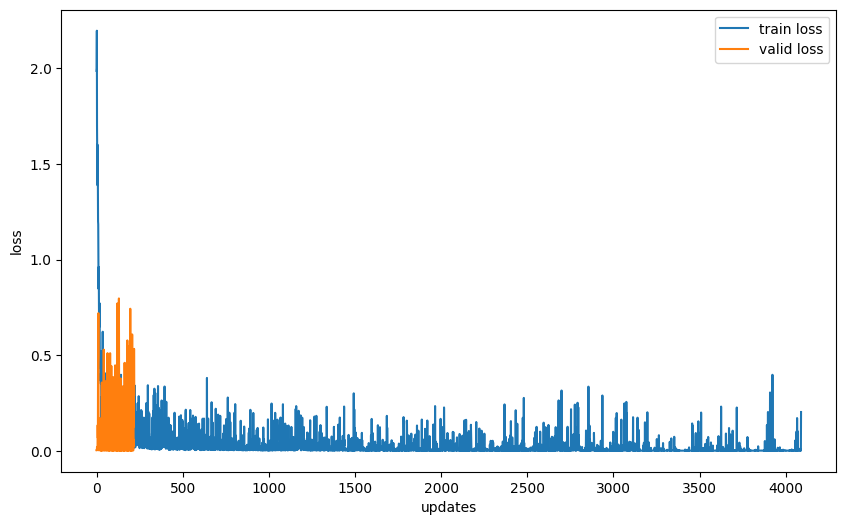

In [59]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_losses, label='train loss')
ax.plot(valid_losses, label='valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss');

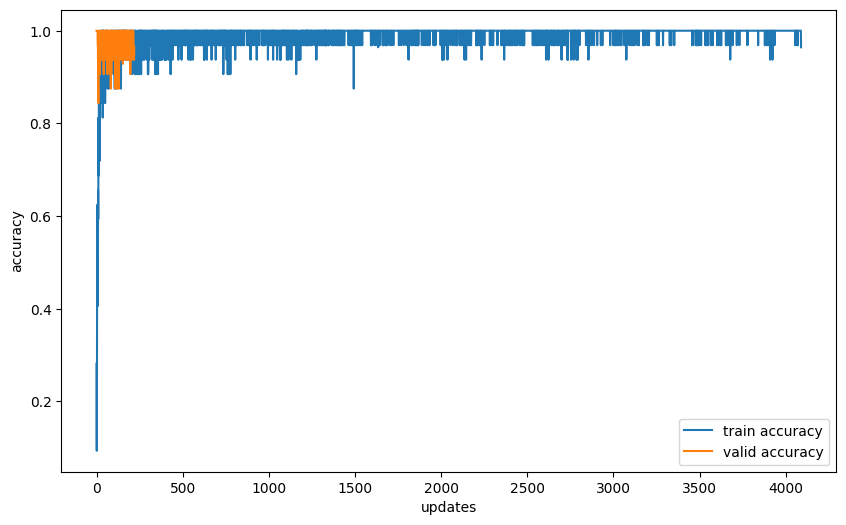

In [60]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_accs, label='train accuracy')
ax.plot(valid_accs, label='valid accuracy')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('accuracy');

In [61]:
test_loss, test_acc = evaluate(test_dataloader, model, criterion, device)

epoch_test_loss = np.mean(test_loss)
epoch_test_acc = np.mean(test_acc)

print(f'test_loss: {epoch_test_loss:.3f}, test_acc: {epoch_test_acc:.3f}')

evaluating...: 100%|██████████| 22/22 [00:00<00:00, 261.14it/s]
test_loss: 0.230, test_acc: 0.958


In [62]:
text = 'book canteen at 16 o clock'

In [63]:
ids = tokenizer(text)["input_ids"]
ids

[101, 2338, 26449, 2012, 2385, 1051, 5119, 102]

In [64]:
tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
tensor

tensor([[  101,  2338, 26449,  2012,  2385,  1051,  5119,   102]],
       device='cuda:0')

In [65]:
prediction = model(tensor).squeeze(dim=0)
print(prediction)

tensor([-2.4442, -2.4054, -0.6272, -0.7262, -1.4111, -1.1158,  9.7489],
       device='cuda:0', grad_fn=<SqueezeBackward1>)


In [66]:
probability = torch.softmax(prediction, dim=-1)
probability

tensor([5.0651e-06, 5.2655e-06, 3.1165e-05, 2.8228e-05, 1.4231e-05, 1.9120e-05,
        9.9990e-01], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [67]:
predicted_idx = prediction.argmax(dim=-1).item()
predicted_idx

6

In [68]:
idx_to_label[predicted_idx]

'BookRestaurant'

In [69]:
def process_line(text, model, tokenizer, idx_to_label, device):
    ids = tokenizer(text)["input_ids"]
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_idx = prediction.argmax(dim=-1).item()
    predicted_class = idx_to_label[predicted_idx]
    predicted_probability = probability[predicted_idx].item()
    return predicted_class, predicted_probability

In [70]:
text = 'book canteen at 16 o clock'

process_line(text, model, tokenizer, idx_to_label, device)

('BookRestaurant', 0.9998970031738281)

In [71]:
text = 'I want to listen something nice'

process_line(text, model, tokenizer, idx_to_label, device)

('PlayMusic', 0.9988489151000977)

In [72]:
text = 'How cold it will be tomorrow?'

process_line(text, model, tokenizer, idx_to_label, device)

('GetWeather', 0.9999145269393921)

Как считать метрики для выделения именованных сущностей:

In [74]:
from evaluate import load

In [75]:
metric = load("seqeval")

In [76]:
predictions = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'],
               ['B-PER', 'I-PER', 'O']]
true_values = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'],
               ['B-PER', 'I-PER', 'O']]

In [77]:
results = metric.compute(predictions=predictions, references=true_values)

In [78]:
results

{'MISC': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 1},
 'PER': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 0.5,
 'overall_recall': 0.5,
 'overall_f1': 0.5,
 'overall_accuracy': 0.8}